<a href="https://colab.research.google.com/github/evanss-ankomah/PRODIGY_ML_02/blob/main/PRODIGY_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [27]:
data = pd.read_csv('Mall_Customers.csv')

In [28]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
data.shape

(200, 5)

In [30]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


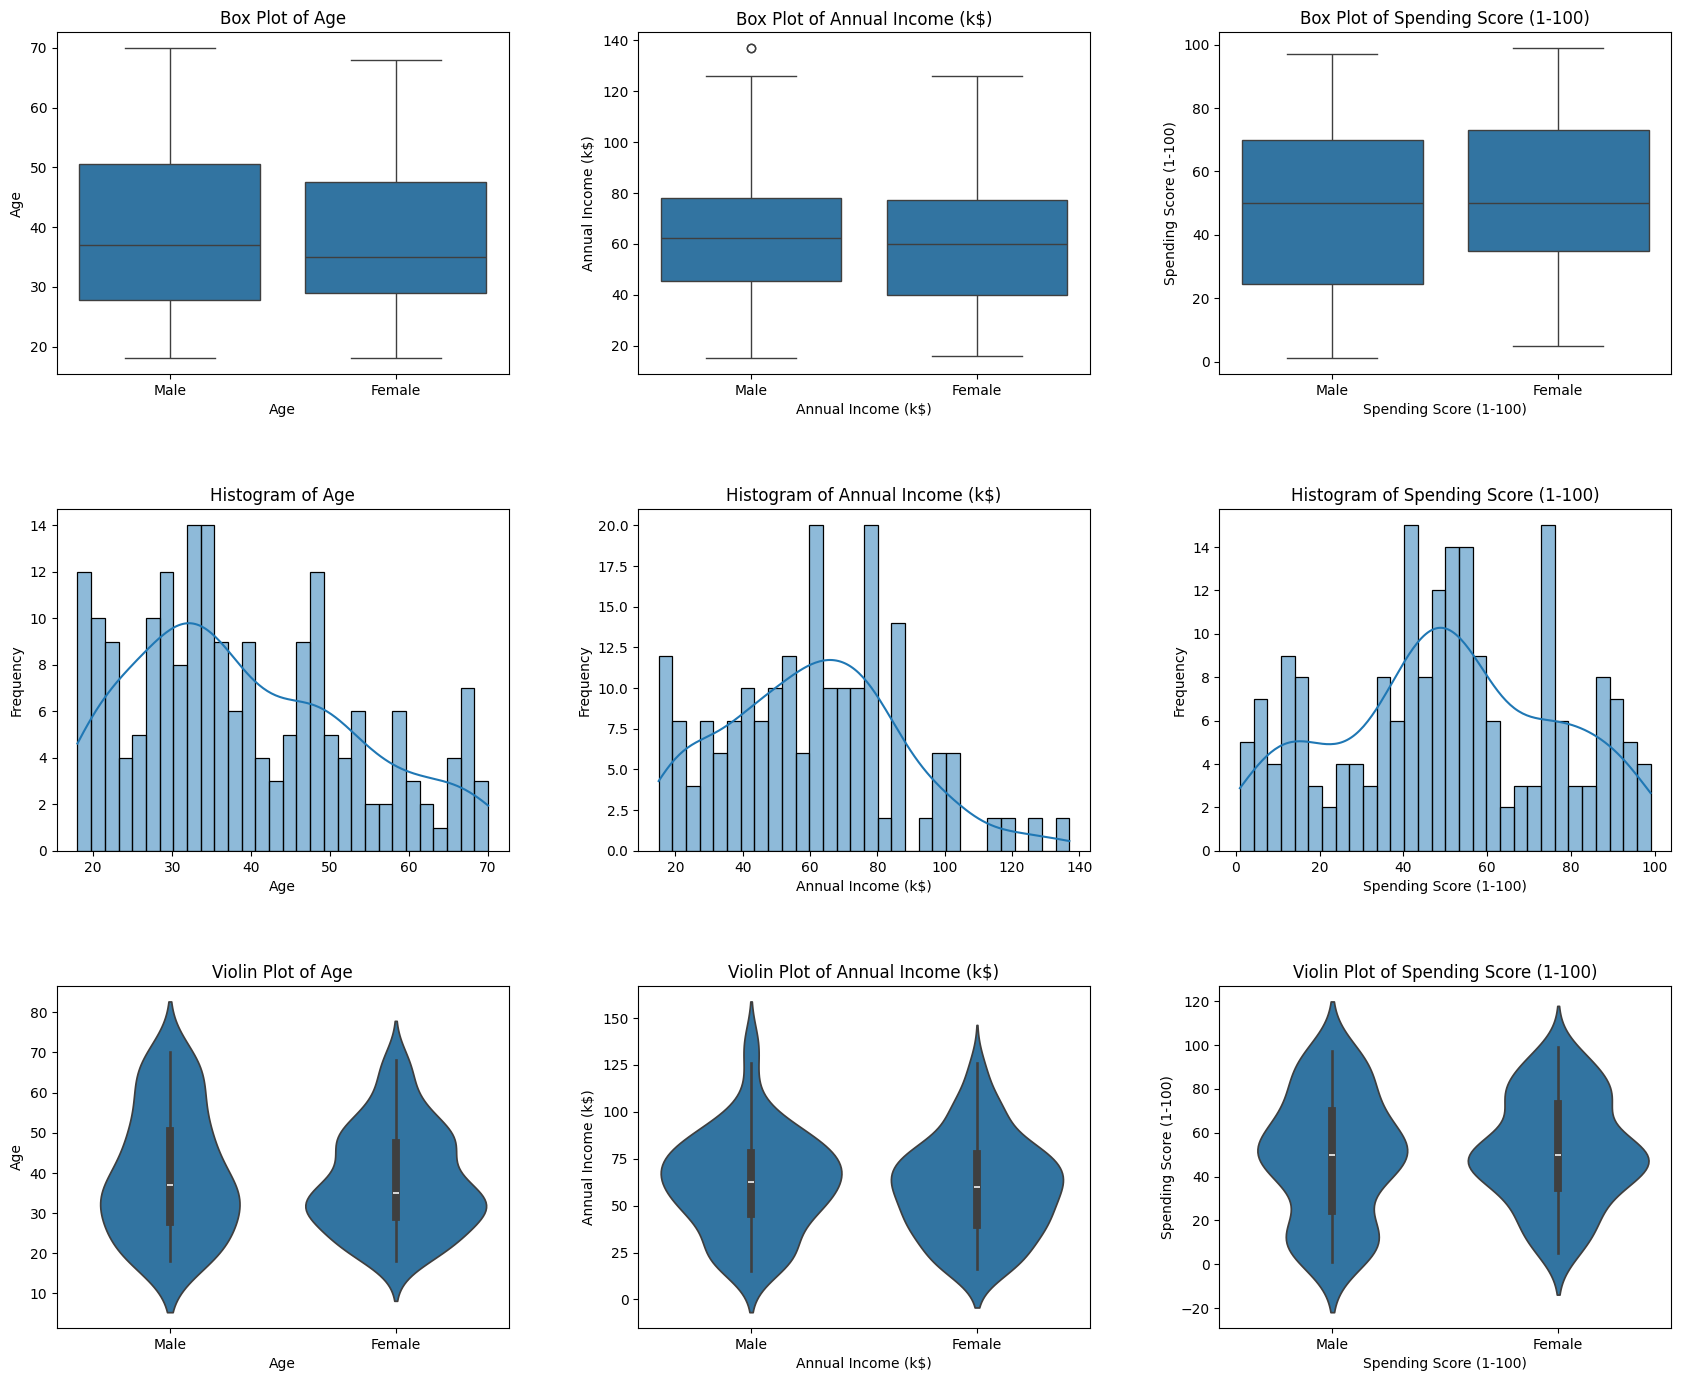

In [31]:
continuous_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

plt.figure(figsize=(18, 15))

for i, column in enumerate(continuous_columns):
    # Box plot subplot
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data['Gender'],y=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    # Histogram subplot
    plt.subplot(3, 3, i + 4)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Violin plot subplot
    plt.subplot(3, 3, i + 7)
    sns.violinplot(x=data['Gender'],y=data[column])
    plt.title(f'Violin Plot of {column}')
    plt.xlabel(column)

plt.tight_layout(pad=5)
plt.show()

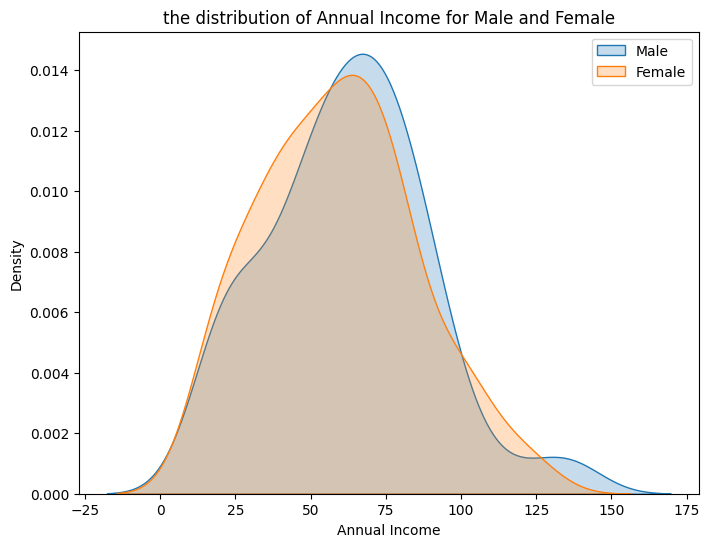

In [32]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data[data['Gender'] == 'Male']['Annual Income (k$)'], label='Male', shade=True)
sns.kdeplot(data[data['Gender'] == 'Female']['Annual Income (k$)'], label='Female', shade=True)
plt.title('the distribution of Annual Income for Male and Female')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.legend()
plt.show()

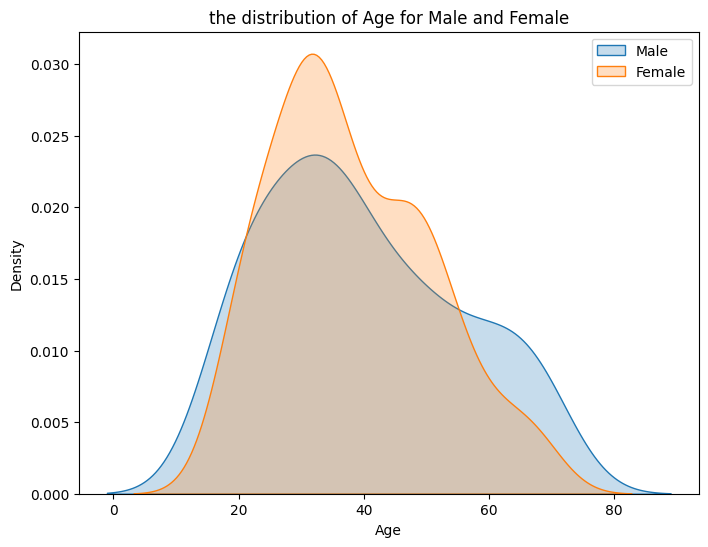

In [34]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data[data['Gender'] == 'Male']['Age'], label='Male', shade=True)
sns.kdeplot(data[data['Gender'] == 'Female']['Age'], label='Female', shade=True)
plt.title('the distribution of Age for Male and Female')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

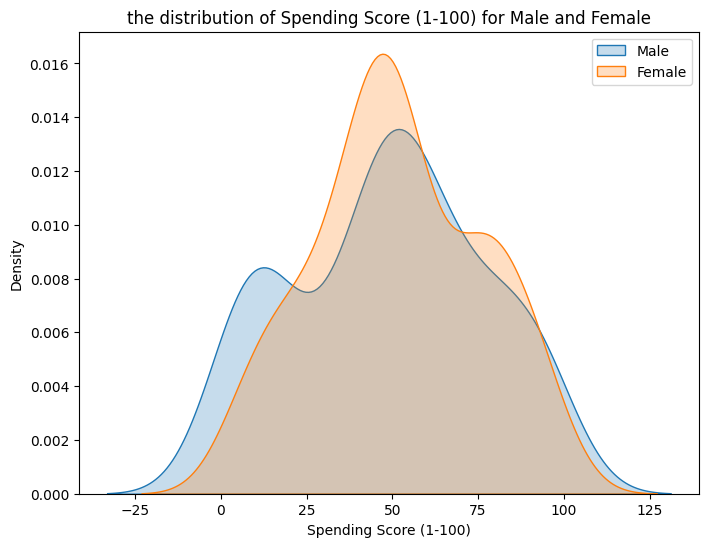

In [35]:

plt.figure(figsize=(8, 6))
sns.kdeplot(data[data['Gender'] == 'Male']['Spending Score (1-100)'], label='Male', shade=True)
sns.kdeplot(data[data['Gender'] == 'Female']['Spending Score (1-100)'], label='Female', shade=True)
plt.title('the distribution of Spending Score (1-100) for Male and Female')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [36]:
data=data.drop('CustomerID',axis=1)

In [37]:
data.groupby('Gender').aggregate(['min','max','mean'])

Age                Annual Income (k$)                  \
       min max       mean                min  max       mean   
Gender                                                         
Female  18  68  38.098214                 16  126  59.250000   
Male    18  70  39.806818                 15  137  62.227273   

       Spending Score (1-100)                 
                          min max       mean  
Gender                                        
Female                      5  99  51.526786  
Male                        1  97  48.511364

In [39]:
data['Gender']=data['Gender'].replace({'Male':0,'Female':1})

In [40]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


<Axes: >

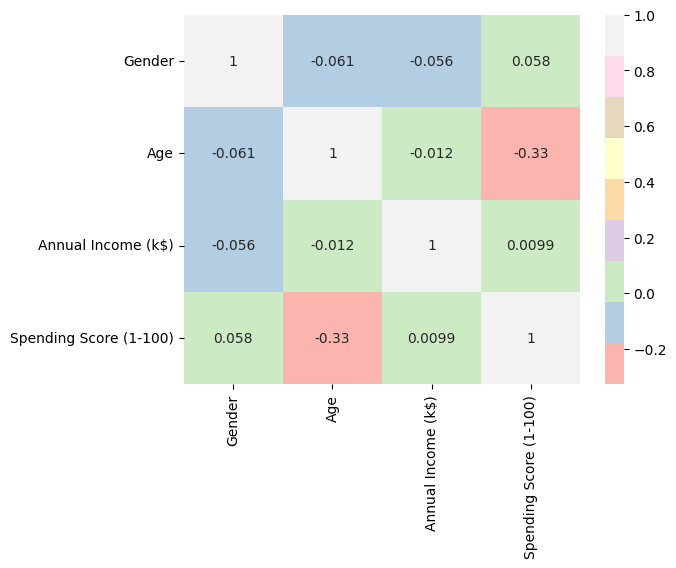

In [45]:
sns.heatmap(data.corr(),annot=True,cmap='Pastel1')

In [46]:
x = data.iloc[:,[2,3]].values

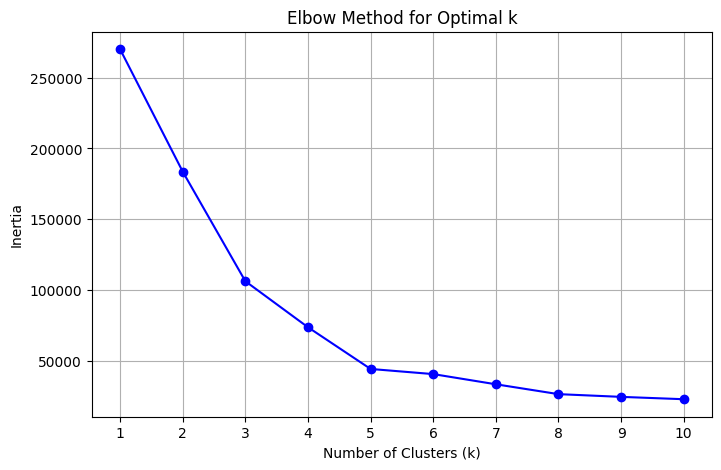

In [47]:
from sklearn.cluster import KMeans

# Defining the range of k values to test
k_values = range(1, 11)

# List to store the inertia (sum of squared distances)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

In [48]:
optimal_k = 5

# Create and fit the KMeans model
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans_optimal.fit_predict(x)

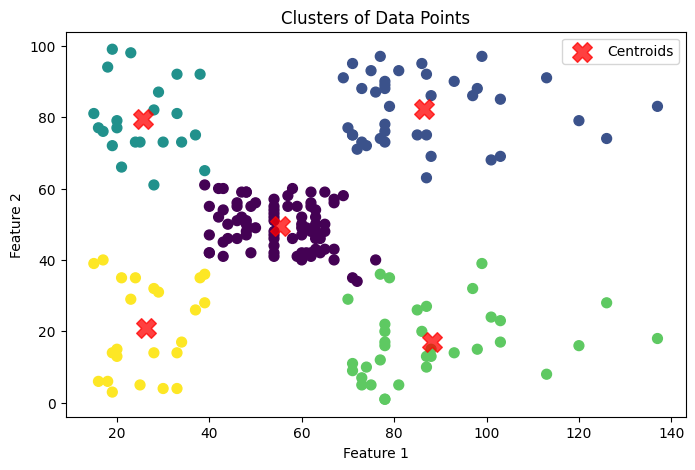

In [49]:
# Plotting the clusters and their centers
plt.figure(figsize=(8, 5))
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the cluster centers
centers = kmeans_optimal.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title('Clusters of Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import silhouette_score # type: ignore

silhouette_avg = silhouette_score(x, y_kmeans)
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

Silhouette Score for 5 clusters: 0.553931997444648
